In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=14
plt.rcParams['mathtext.fontset']='stix'
#-------------------------#

In [2]:
import FT as FT

In [3]:
#load the module

from os import  getcwd, chdir

curDir=getcwd()#this is the directory of the notebook
chdir('../../src')#go to the direcory that interfacePy is located
from interfacePy.Axion import Axion 
from interfacePy.WKB import relic 
from interfacePy.Cosmo import Hubble,s
from interfacePy.AxionMass import ma2

chdir(curDir)#return to the directory of the notebook

In [4]:
#load theta_i, fa, Tosc, theta_osc, relic

#for RD universe
RDdat=np.loadtxt('RD.dat')
#for NSC
NSCdat=np.loadtxt('NSC.dat')

In [5]:
def NSC(fa):
    '''find the approximate entropy injection factor between Tosc and today in NSC and Tosc'''
    inputFile="../../Examples/InputExamples/NSCinput.dat" 
    _=np.loadtxt(inputFile)
    for u,T,logH in _[_[:,1]<20]:
        if ma2(T,fa)**0.5>=3*np.exp(logH):
            break
    uosc,Tosc=u,T
    
    return s(_[-1][1])/s(Tosc)*np.exp(3*(_[-1][0]-uosc)),Tosc

In [8]:
diff_i=[]
diff_osc=[]
gamma_osc=[]
for theta_i,fa,theta_osc,T_osc,Omegah2 in NSCdat:
    gamma,Tosc=NSC(fa)
    gamma_osc.append(gamma)
    diff_i.append(np.abs(Omegah2-relic(T_osc,theta_i,gamma))/Omegah2)
    diff_osc.append(np.abs(Omegah2-relic(T_osc,theta_osc,gamma))/Omegah2)

    
diff_i=np.array(diff_i)
diff_osc=np.array(diff_osc)

<IPython.core.display.Javascript object>


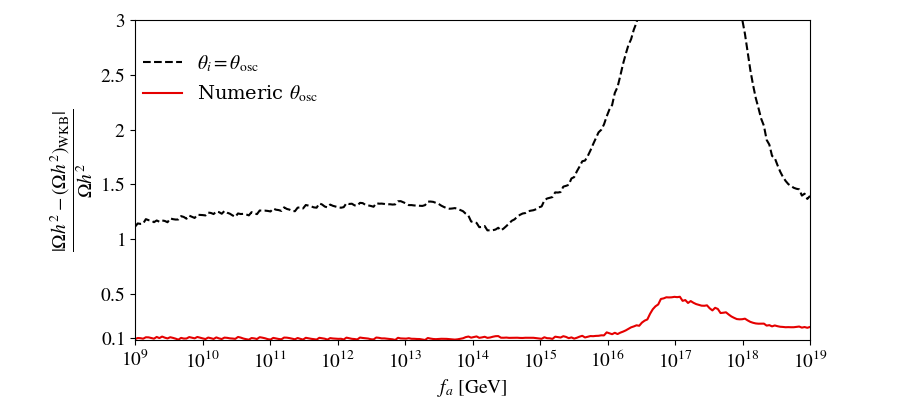

In [21]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')

sub = fig.add_subplot(1,1,1)

sub.plot(NSCdat[:,1],diff_i,linestyle='--',c='xkcd:black',label=r"$\theta_i = \theta_{\rm osc}$")
sub.plot(NSCdat[:,1],diff_osc,linestyle='-',c='xkcd:red',label=r"Numeric $\theta_{\rm osc}$")

sub.set_xlabel(r'$f_a ~ [{\rm GeV}]$')
sub.set_ylabel(r'$\dfrac{\left|\Omega h^2 - \left(\Omega h^2\right)_{\rm WKB}\right|}{\Omega h^2}$')

sub.legend(bbox_to_anchor=(0.01, 0.9),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper left',fontsize=14,framealpha=0)
#set major ticks
_M_xticks=[ 10.**i for i in range(9,20) ]
_M_yticks=[  0.1 if i==0 else 0.5*i for i in range(0,10) ]

#set major ticks that will not have a label
_M_xticks_exception=[]
_M_yticks_exception=[]

_m_xticks=[]
_m_yticks=[]  
ft=FT.FT(_M_xticks,_M_yticks,
             _M_xticks_exception,_M_yticks_exception,
             _m_xticks,_m_yticks,
             xmin=1e9,xmax=1e19,ymin=0.8e-1,ymax=3,xscale='log',yscale='linear')

ft.format_ticks(plt,sub)    

plt.savefig('NSC_WKB_diff.pdf',bbox_inches='tight')

fig.show()

<IPython.core.display.Javascript object>


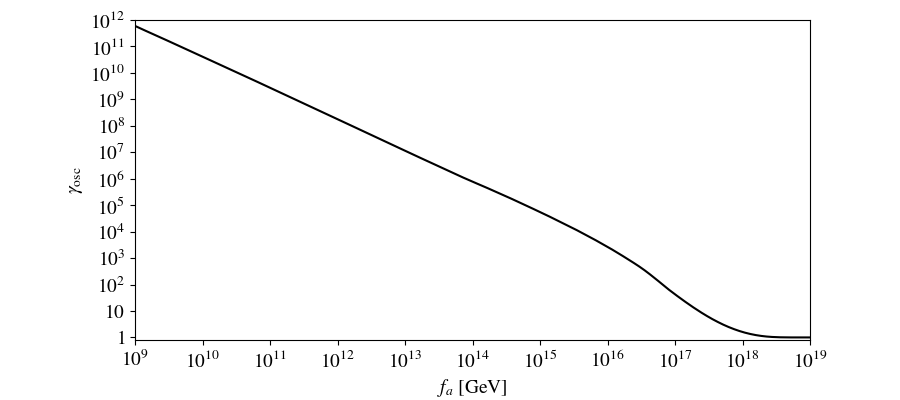

In [31]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')

sub = fig.add_subplot(1,1,1)

sub.plot(NSCdat[:,1],gamma_osc,linestyle='-',c='xkcd:black')

sub.set_xlabel(r'$f_a ~ [{\rm GeV}]$')
sub.set_ylabel(r'$\gamma_{\rm osc}$')

#set major ticks
_M_xticks=[ 10.**i for i in range(9,20) ]
_M_yticks=[ 10.**i for i in range(-1,13) ]

#set major ticks that will not have a label
_M_xticks_exception=[]
_M_yticks_exception=[]

_m_xticks=[]
_m_yticks=[]  
ft=FT.FT(_M_xticks,_M_yticks,
             _M_xticks_exception,_M_yticks_exception,
             _m_xticks,_m_yticks,
             xmin=1e9,xmax=1e19,ymin=0.8,ymax=1e12,xscale='log',yscale='log')

ft.format_ticks(plt,sub) 
plt.savefig('gamma_osc.pdf',bbox_inches='tight')

fig.show()

In [22]:
diff_i=[]
diff_osc=[]

for theta_i,fa,theta_osc,T_osc,Omegah2 in RDdat:
    diff_i.append(np.abs(Omegah2-relic(T_osc,theta_i))/Omegah2)
    diff_osc.append(np.abs(Omegah2-relic(T_osc,theta_osc))/Omegah2)

    
diff_i=np.array(diff_i)
diff_osc=np.array(diff_osc)

<IPython.core.display.Javascript object>


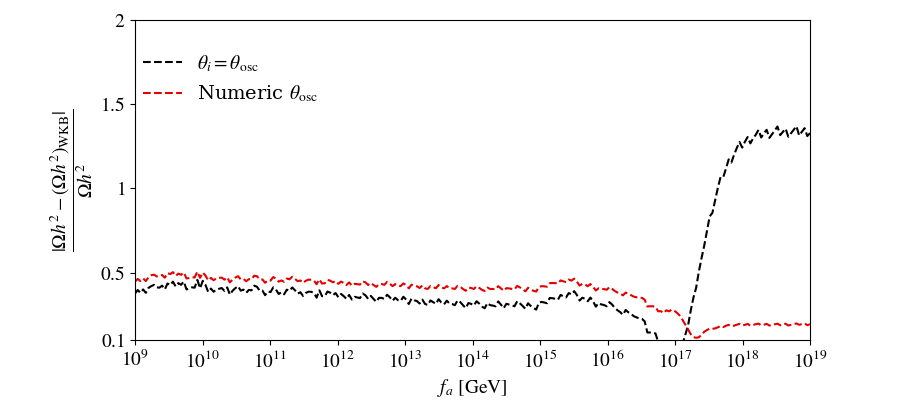

In [25]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')

sub = fig.add_subplot(1,1,1)

sub.plot(NSCdat[:,1],diff_i,linestyle='--',c='xkcd:black',label=r"$\theta_i = \theta_{\rm osc}$")
sub.plot(NSCdat[:,1],diff_osc,linestyle='--',c='xkcd:red',label=r"Numeric $\theta_{\rm osc}$")

sub.set_xlabel(r'$f_a ~ [{\rm GeV}]$')
sub.set_ylabel(r'$\dfrac{\left|\Omega h^2 - \left(\Omega h^2\right)_{\rm WKB}\right|}{\Omega h^2}$')

sub.legend(bbox_to_anchor=(0.01, 0.9),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper left',fontsize=14,framealpha=0)
#set major ticks
_M_xticks=[ 10.**i for i in range(9,20) ]
_M_yticks=[  0.1 if i==0 else 0.5*i for i in range(0,10) ]

#set major ticks that will not have a label
_M_xticks_exception=[]
_M_yticks_exception=[]

_m_xticks=[]
_m_yticks=[]  
ft=FT.FT(_M_xticks,_M_yticks,
             _M_xticks_exception,_M_yticks_exception,
             _m_xticks,_m_yticks,
             xmin=1e9,xmax=1e19,ymin=0.1,ymax=2,xscale='log',yscale='linear')

ft.format_ticks(plt,sub)    


plt.savefig('RD_WKB_diff.pdf',bbox_inches='tight')
fig.show()